# ESERCIZIO FINALE MODULO PYTHON
## Database covid 

In [1]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
#importazione file e trasformazione in dataframe pandas
path = '../PYTHON/owid-covid-data.csv'
cv = pd.read_csv(path)

##### Prima parte: esplorazione 

In [2]:
cv.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
244805,NGA,Africa,Nigeria,2020-01-13,NaN,0.0,0.000,NaN,0.0,0.000,...,10.8,41.949,NaN,54.69,0.539,218541216.0,NaN,NaN,NaN,NaN
303387,SAU,Asia,Saudi Arabia,2023-07-02,841469.0,0.0,0.000,9646.0,0.0,0.000,...,25.4,NaN,2.70,75.13,0.854,36408824.0,NaN,NaN,NaN,NaN
42888,BES,North America,Bonaire Sint Eustatius and Saba,2023-12-07,11922.0,0.0,0.000,41.0,0.0,0.000,...,NaN,NaN,NaN,77.79,NaN,27052.0,NaN,NaN,NaN,NaN
50028,BRN,Asia,Brunei,2022-06-25,157023.0,0.0,561.429,101.0,0.0,0.000,...,30.9,NaN,2.70,75.86,0.838,449002.0,NaN,NaN,NaN,NaN
167952,JAM,North America,Jamaica,2022-01-06,94649.0,0.0,327.714,2476.0,0.0,2.000,...,28.6,66.425,1.70,74.47,0.734,2827382.0,NaN,NaN,NaN,NaN
353540,TUR,Asia,Turkey,2023-04-21,17004677.0,0.0,0.000,101419.0,0.0,0.000,...,41.1,NaN,2.81,77.69,0.820,85341248.0,NaN,NaN,NaN,NaN
349191,TON,Oceania,Tonga,2023-12-30,16888.0,0.0,0.000,12.0,0.0,0.000,...,44.4,NaN,2.60,70.91,0.725,106867.0,NaN,NaN,NaN,NaN
214265,MUS,Africa,Mauritius,2020-06-28,341.0,4.0,0.571,10.0,0.0,0.000,...,40.7,NaN,3.40,74.99,0.804,1299478.0,NaN,NaN,NaN,NaN
156735,IDN,Asia,Indonesia,2020-09-24,244676.0,0.0,3756.286,9553.0,0.0,118.571,...,76.1,64.204,1.04,71.72,0.718,275501344.0,NaN,NaN,NaN,NaN
233008,NAM,Africa,Namibia,2021-05-25,52946.0,0.0,246.857,765.0,0.0,6.714,...,34.2,44.600,NaN,63.71,0.646,2567024.0,NaN,NaN,NaN,NaN


In [7]:
cv.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [3]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387330 entries, 0 to 387329
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387330 non-null  object 
 1   continent                                   368774 non-null  object 
 2   location                                    387330 non-null  object 
 3   date                                        387330 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

In [4]:
#noto che la colonna 'date' è di tipo oggetto. La correggo
cv['date'] = pd.to_datetime(cv['date'], format="%Y-%m-%d")

In [5]:
cv.date.dtypes

dtype('<M8[ns]')

In [6]:
cv.describe()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,387330,3.483330e+05,3.762800e+05,3.750500e+05,3.261090e+05,376589.000000,375359.000000,348333.000000,376280.000000,375050.000000,...,222683.000000,147332.000000,265635.000000,356730.000000,291692.000000,3.873300e+05,1.318700e+04,13187.000000,13187.000000,13187.000000
mean,2022-02-09 11:01:38.093099264,7.386532e+06,8.728781e+03,8.756916e+03,8.996469e+04,78.157939,78.405166,112347.967657,132.572340,133.002194,...,32.910922,50.793168,3.097544,73.712526,0.722586,1.292804e+08,5.579910e+04,9.770265,10.979027,1777.206419
min,2020-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,2021-01-24 00:00:00,9.448000e+03,0.000000e+00,0.000000e+00,1.360000e+02,0.000000,0.000000,2954.509000,0.000000,0.000000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.781000e+02,2.080000,-1.490000,120.205410
50%,2022-02-09 00:00:00,7.971300e+04,0.000000e+00,1.700000e+01,1.393000e+03,0.000000,0.143000,32240.542000,0.000000,4.197000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,6.694300e+03,8.150000,5.660000,1248.656900
75%,2023-02-26 00:00:00,8.516680e+05,0.000000e+00,4.024290e+02,1.257300e+04,0.000000,4.000000,155233.877000,0.000000,68.598000,...,41.300000,82.686750,4.200000,79.460000,0.829000,2.830170e+07,3.877775e+04,15.050000,15.690000,2878.521250
max,2024-04-03 00:00:00,7.749544e+08,4.423623e+07,6.319461e+06,7.040264e+06,103719.000000,14817.000000,765370.756000,240325.866000,34332.267000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.345330e+06,78.080000,377.830000,10293.515000
std,NaN,4.398509e+07,2.397048e+05,9.038526e+04,4.566992e+05,1424.517554,534.387547,160036.519608,1544.311765,571.529927,...,13.572648,31.952844,2.548154,7.394828,0.149001,6.634103e+08,1.559496e+05,12.022926,24.585788,1992.786873


In [8]:
for column in cv:
    n_count= cv[column].isna().sum()
    n_perc = round((n_count/cv.shape[0]) *100,2)
    print(f"{column} ha {n_count} nan; è il {n_perc}% dell'intera colonna.")


iso_code ha 0 nan; è il 0.0% dell'intera colonna.
continent ha 18556 nan; è il 4.79% dell'intera colonna.
location ha 0 nan; è il 0.0% dell'intera colonna.
date ha 0 nan; è il 0.0% dell'intera colonna.
total_cases ha 38997 nan; è il 10.07% dell'intera colonna.
new_cases ha 11050 nan; è il 2.85% dell'intera colonna.
new_cases_smoothed ha 12280 nan; è il 3.17% dell'intera colonna.
total_deaths ha 61221 nan; è il 15.81% dell'intera colonna.
new_deaths ha 10741 nan; è il 2.77% dell'intera colonna.
new_deaths_smoothed ha 11971 nan; è il 3.09% dell'intera colonna.
total_cases_per_million ha 38997 nan; è il 10.07% dell'intera colonna.
new_cases_per_million ha 11050 nan; è il 2.85% dell'intera colonna.
new_cases_smoothed_per_million ha 12280 nan; è il 3.17% dell'intera colonna.
total_deaths_per_million ha 61221 nan; è il 15.81% dell'intera colonna.
new_deaths_per_million ha 10741 nan; è il 2.77% dell'intera colonna.
new_deaths_smoothed_per_million ha 11971 nan; è il 3.09% dell'intera colonna.


##### Seconda parte: analisi 

In [9]:
#I total cases sono dati cumulativi, di conseguenza il loro valore massimo dovrebbe corrispondere alla somma dei new cases ma non è cosi.
#L'analisi di conseguenza si svolgerà utilizzando la somma dei new cases, che da risultati più reali.
print(cv.groupby('continent')['total_cases'].max())
print(cv.groupby('continent')['new_cases'].sum())

continent
Africa             4072636.0
Asia              99343195.0
Europe            38997490.0
North America    103436829.0
Oceania           11812024.0
South America     37519960.0
Name: total_cases, dtype: float64
continent
Africa            13141282.0
Asia             301446461.0
Europe           252376812.0
North America    124530643.0
Oceania           14808170.0
South America     68718448.0
Name: new_cases, dtype: float64


In [28]:
#la colonna continent ha il 4.79% di NaN, esattamente 18556 valori. 
contdropna = cv.dropna(subset=('continent'))
print(f"La somma di casi per continente è: \n{contdropna.groupby('continent')['new_cases'].sum()}")
#La scelta dell'utilizzo di 'new cases' al posto di 'total cases' è stata fatta perchè i secondi sono dati cumulativi..

La somma di casi per continente è: 
continent
Africa            13141282.0
Asia             301446461.0
Europe           252376812.0
North America    124530643.0
Oceania           14808170.0
South America     68718448.0
Name: new_cases, dtype: float64


In [26]:
africa = cv[cv['continent'] == 'Africa'].new_cases.agg(['min','max','mean']).round()
europe = cv[cv['continent'] == 'Europe'].new_cases.agg(['min','max','mean']).round()
eu_tot = cv[cv['continent'] == 'Europe'].new_cases.sum().round()
af_tot = cv[cv['continent'] == 'Africa'].new_cases.sum().round()
tot_world = cv.new_cases.sum().round()
eu_perc = (eu_tot/tot_world*100).round(1)
af_perc = (af_tot/tot_world*100).round(1)

print(f'Valori statistici casi totali per Europa: \nperc          {eu_perc}% \n{europe} \nValori statistici casi totali per Africa:\nperc        {af_perc}% \n{africa}')

Valori statistici casi totali per Europa: 
perc          7.7% 
min           0.0
max     2417043.0
mean       3258.0
Name: new_cases, dtype: float64 
Valori statistici casi totali per Africa:
perc        0.4% 
min          0.0
max     162987.0
mean       150.0
Name: new_cases, dtype: float64


In [21]:
tot_world

3284465605.0

In [13]:
italia22 =cv[(cv.location =='Italy')&(cv.date.dt.year == 2022)]
italia22

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
166403,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
166404,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472.0,168226.3,12.99,8.06,2849.4834
166405,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
166406,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
166407,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166763,ITA,Europe,Italy,2022-12-27,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
166764,ITA,Europe,Italy,2022-12-28,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
166765,ITA,Europe,Italy,2022-12-29,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
166766,ITA,Europe,Italy,2022-12-30,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Andamento dei casi covid totali registrati in Italia')

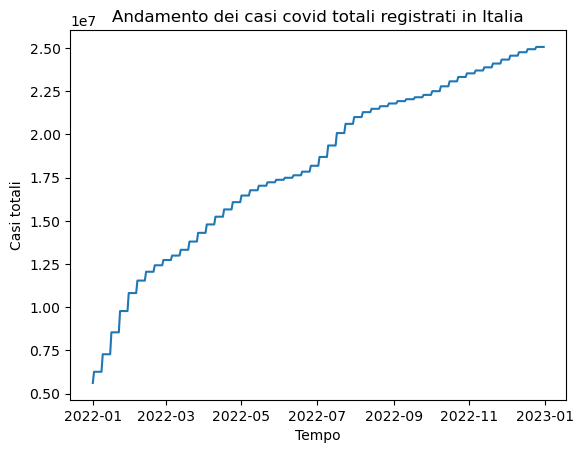

In [14]:
plt.plot(italia22['date'],italia22['total_cases'], label='Numero casi')
plt.xlabel('Tempo')
plt.ylabel('Casi totali')
plt.title('Andamento dei casi covid totali registrati in Italia')

Text(0.5, 1.0, 'Andamento dei casi covid registrati in Italia')

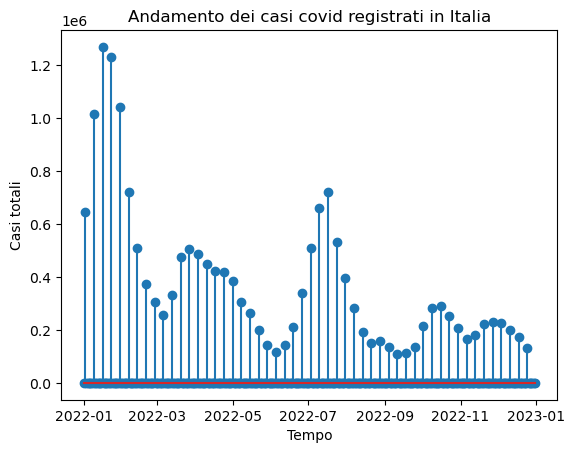

In [15]:
plt.stem(italia22['date'],italia22['new_cases'], label='Numero casi')
plt.xlabel('Tempo')
plt.ylabel('Casi totali')
plt.title('Andamento dei casi covid registrati in Italia')

<Axes: xlabel='icu_patients', ylabel='location'>

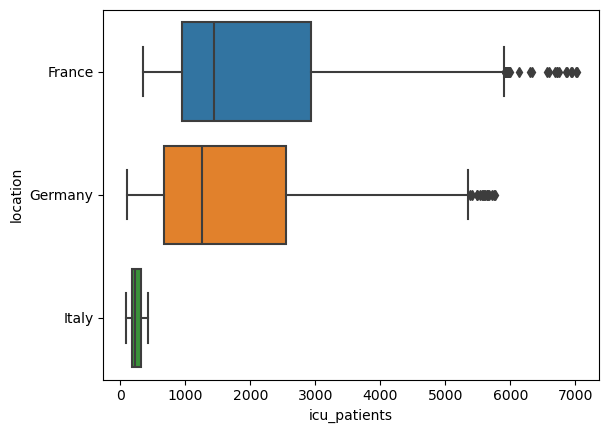

In [16]:
dati_2223= cv[cv.date.between('2022-05-01','2023-03-31')& (cv.location == 'Italy') | (cv.location == 'France') | (cv.location == 'Germany')]
sns.boxplot(data=dati_2223, x='icu_patients',y='location')

L'Italia risulta il paese con il numero minore di pazienti in terapia intensiva.

Text(0.5, 1.0, 'Confronto numero pazienti ospedalizzati in Germania, Francia, Italia')

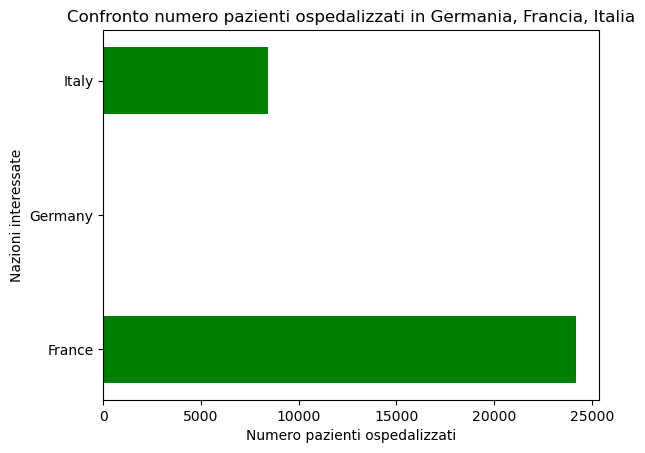

In [17]:
dati_2023 = cv[(cv['date'].dt.year == 2023 )& ((cv.location == 'Italy') | (cv.location == 'France') | (cv.location == 'Germany'))]
plt.barh(dati_2023['location'],dati_2023['hosp_patients'],0.5, color='green')
plt.xlabel('Numero pazienti ospedalizzati')
plt.ylabel('Nazioni interessate')
plt.title('Confronto numero pazienti ospedalizzati in Germania, Francia, Italia')